## 1 快速入门

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root = 'data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:05<00:00, 5040029.66it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 168274.33it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2634093.12it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [ ]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f'Shape of X: {X.shape} {X.dtype}')
    print(f'Shape of y: {y.shape} {y.dtype}')
    break

Shape of X: torch.Size([64, 1, 28, 28]) torch.float32
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# 创建模型
device = (
    'cuda' 
    if torch.cuda.is_available()
    else 'cpu' 
)
device

'cpu'

In [ ]:
inputs = torch.randn(32,1,5,5)
x = nn.Flatten()  # 默认start_dim=1, end_dim=-1
y = nn.Flatten(0, 2)
outputs = x(inputs)
outputs2 = y(inputs)
outputs.size(), outputs2.size()


(torch.Size([32, 25]), torch.Size([160, 5]))

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork().to(device)
print(model)
        

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch %100 == 0:
            loss, current = loss.item(), (batch+1) * len(X)
            print(f'loss: {loss:>7f} [{current:>5d} / {size:>5d}]')

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size        
    print(f'Test error: \n Accuracy: {(100*correct):>1f}%, Avg_loss: {test_loss:>7f} \n')

In [ ]:
epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}\n')
    print('-' * 10)
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print('Done!')    

Epoch 1

----------
loss: 2.306669 [   64 / 60000]
loss: 2.297676 [ 6464 / 60000]
loss: 2.282535 [12864 / 60000]
loss: 2.281415 [19264 / 60000]
loss: 2.261446 [25664 / 60000]
loss: 2.235388 [32064 / 60000]
loss: 2.242218 [38464 / 60000]
loss: 2.212321 [44864 / 60000]
loss: 2.206462 [51264 / 60000]
loss: 2.181733 [57664 / 60000]
Test error: 
 Accuracy: 49.460000%, Avg_loss: 2.182144 

Epoch 2

----------
loss: 2.185172 [   64 / 60000]
loss: 2.176185 [ 6464 / 60000]
loss: 2.131725 [12864 / 60000]
loss: 2.146074 [19264 / 60000]
loss: 2.104930 [25664 / 60000]
loss: 2.052227 [32064 / 60000]
loss: 2.075269 [38464 / 60000]
loss: 2.006990 [44864 / 60000]
loss: 2.002497 [51264 / 60000]
loss: 1.944758 [57664 / 60000]
Test error: 
 Accuracy: 59.300000%, Avg_loss: 1.943925 

Epoch 3

----------
loss: 1.971136 [   64 / 60000]
loss: 1.941150 [ 6464 / 60000]
loss: 1.838982 [12864 / 60000]
loss: 1.870493 [19264 / 60000]
loss: 1.781538 [25664 / 60000]
loss: 1.725825 [32064 / 60000]
loss: 1.744826 [3846

In [ ]:
# 保存模型
torch.save(model.state_dict(), 'model.pth')
print('Saved model state to model.pth')

Saved model state to model.pth


In [ ]:
# 加载模型
model = NeuralNetwork().to(device)
# model.load_state_dict(torch.load('model.pth', weights_only=True))
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [ ]:
test_data, type(test_data),test_data[0][0].shape

(Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 torchvision.datasets.mnist.FashionMNIST,
 torch.Size([1, 28, 28]))

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    print(pred)
    print(f'pred shape: {pred.shape}, x shape: {x.shape}')
    print(pred[0].argmax(0))
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: {predicted}, Actual: {actual}')

tensor([[-2.2509, -2.4272, -0.7701, -2.2430, -0.7664,  2.1912, -1.1621,  2.4913,
          1.6496,  2.8904]])
pred shape: torch.Size([1, 10]), x shape: torch.Size([1, 28, 28])
tensor(9)
Predicted: Ankle boot, Actual: Ankle boot


In [ ]:
aaa = torch.tensor([1,3,9,2,4,6,-10])
aaa

tensor([  1,   3,   9,   2,   4,   6, -10])

In [ ]:
aaa.argmax(0) # 返回0维度最大位置的索引

tensor(2)

## 2 预备知识

### 2.1数据操作

#### 读取写入数据

In [10]:
import torch

x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([16])

In [5]:
x.numel()

16

In [11]:
x = x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [12]:
x = x.reshape(6,-1)
x

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

In [16]:
torch.zeros((2, 3,4))  # 全0

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [21]:
print(torch.ones((3,4,5)))  # 传入一个元组
print(torch.ones(3,4,5))

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [18]:
torch.randn(3,4)

tensor([[ 0.3439, -0.1357,  0.8815,  0.9000],
        [ 0.9647,  0.3105, -0.6356, -0.2871],
        [-0.8133, -1.2003, -0.0548, -0.1750]])

In [22]:
torch.tensor([[2,1,3,4],[6,6,6,6],[7,8,9,1]])

tensor([[2, 1, 3, 4],
        [6, 6, 6, 6],
        [7, 8, 9, 1]])

#### 数据运算

In [25]:
x = torch.tensor([1, 3 , 5, 7])
y = torch.tensor([2,4,6,8])
x, y, x+y, x-y, x*y, x/y, x**y

(tensor([1, 3, 5, 7]),
 tensor([2, 4, 6, 8]),
 tensor([ 3,  7, 11, 15]),
 tensor([-1, -1, -1, -1]),
 tensor([ 2, 12, 30, 56]),
 tensor([0.5000, 0.7500, 0.8333, 0.8750]),
 tensor([      1,      81,   15625, 5764801]))

In [26]:
torch.exp(x)

tensor([   2.7183,   20.0855,  148.4132, 1096.6332])

In [28]:
x = torch.arange(12, dtype=torch.float32).reshape(3, 4)
y = torch.tensor([[2,1,3,4],[4,2,3,6],[9,6,3,1]])
x, y, torch.cat((x,y),dim=0), torch.cat((x,y),dim=1)   # dim=0沿行连接， dim1 沿列链接

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2, 1, 3, 4],
         [4, 2, 3, 6],
         [9, 6, 3, 1]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  3.,  4.],
         [ 4.,  2.,  3.,  6.],
         [ 9.,  6.,  3.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  3.,  4.],
         [ 4.,  5.,  6.,  7.,  4.,  2.,  3.,  6.],
         [ 8.,  9., 10., 11.,  9.,  6.,  3.,  1.]]))

In [29]:
x == y

tensor([[False,  True, False, False],
        [ True, False, False, False],
        [False, False, False, False]])

In [53]:
x > y, x<y

(tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]))

In [31]:
x.sum(), y.sum()  # 逐元素求和

(tensor(66.), tensor(44))

#### 广播机制

In [32]:
a = torch.arange(3).reshape(3,1)
b = torch.arange(2).reshape(1,2)
a, b 

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [37]:
# a复制列， b复制行 广播成相同形状
a+b, a+b-b,a+b-a

(tensor([[0, 1],
         [1, 2],
         [2, 3]]),
 tensor([[0, 0],
         [1, 1],
         [2, 2]]),
 tensor([[0, 1],
         [0, 1],
         [0, 1]]))

In [65]:
c = torch.arange(24).reshape(2,3,4)
d = torch.arange(12).reshape(2,3,2)
# c, d, c+d, c+d-d, c+d-c
c, d

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[0],
          [1],
          [2]],
 
         [[3],
          [4],
          [5]]]),
 tensor([[[ 0,  1,  2,  3],
          [ 5,  6,  7,  8],
          [10, 11, 12, 13]],
 
         [[15, 16, 17, 18],
          [20, 21, 22, 23],
          [25, 26, 27, 28]]]))

In [67]:
c = torch.arange(24).reshape(2,3,4)
d = torch.arange(6).reshape(2,3,1)
# c, d, c+d, c+d-d, c+d-c
c, d, c+d, c+d-d, c+d-c

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[0],
          [1],
          [2]],
 
         [[3],
          [4],
          [5]]]),
 tensor([[[ 0,  1,  2,  3],
          [ 5,  6,  7,  8],
          [10, 11, 12, 13]],
 
         [[15, 16, 17, 18],
          [20, 21, 22, 23],
          [25, 26, 27, 28]]]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[0, 0, 0, 0],
          [1, 1, 1, 1],
          [2, 2, 2, 2]],
 
         [[3, 3, 3, 3],
          [4, 4, 4, 4],
          [5, 5, 5, 5]]]))

#### 索引和切片

In [38]:
x, x[-1], x[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [39]:
x[1,2]=9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [40]:
x[0:2, :] = 12  # 沿着0,1行赋值
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

#### 节省内存

In [46]:
before = id(y)  # id返回内存地址
y = y + x

before, id(y), id(y) == before

(2911591593840, 2911591636480, False)

In [47]:
before = id(y)  # id返回内存地址
y[:] = y + x

before, id(y), id(y) == before

(2911591636480, 2911591636480, True)

In [48]:
before = id(y)  # id返回内存地址
y += x

before, id(y), id(y) == before

(2911591636480, 2911591636480, True)

#### 转换成其他python对象

In [50]:
a = x.numpy()
b = torch.tensor(a)
x, a, b, type(a), type(b)

(tensor([[11., 11., 12., 12.],
         [11., 11., 12., 12.],
         [11., 11., 10., 11.]]),
 array([[11., 11., 12., 12.],
        [11., 11., 12., 12.],
        [11., 11., 10., 11.]], dtype=float32),
 tensor([[11., 11., 12., 12.],
         [11., 11., 12., 12.],
         [11., 11., 10., 11.]]),
 numpy.ndarray,
 torch.Tensor)

In [51]:
A = torch.tensor([3.5])
A, A.item(), float(A), int(A)

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.2数据预处理

#### 2.2.1读取数据集

In [70]:
import os

os.makedirs(os.path.join('..','data'), exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')

with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n')
    f.write('2,NA,56400\n')
    f.write('4,NA,88400\n')
    f.write('NA,NA,86400\n')

import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN   56400
2       4.0   NaN   88400
3       NaN   NaN   86400


#### 2.2.2处理缺失值

In [73]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2] # 前者为data前两列，后者为最后一列
means = inputs.mean(numeric_only=True)
inputs = inputs.fillna(means)
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [74]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


#### 2.2.3转换成张量形式

In [80]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
Y = torch.tensor(outputs.to_numpy(dtype=float))
inputs,outputs, X, Y

(   NumRooms  Alley_Pave  Alley_nan
 0       3.0        True      False
 1       2.0       False       True
 2       4.0       False       True
 3       3.0       False       True,
 0    127500
 1     56400
 2     88400
 3     86400
 Name: Price, dtype: int64,
 tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500.,  56400.,  88400.,  86400.], dtype=torch.float64))

#### 2.2.4删除缺失值最多的列

In [81]:
data_copy = data.copy()
data_copy

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,56400
2,4.0,NaN,88400
3,NaN,NaN,86400


In [82]:
# data.isnuLl（）会把所有 NaN 值标记为 True（计为1)，非 NaN 标记为False（计为θ)
#。sum（）会对每一列进行求和，从而得到每列NaN 的总数
missing_counts = data_copy.isnull().sum() 
missing_counts

NumRooms    2
Alley       3
Price       0
dtype: int64

In [83]:
#。idxmax（）会返回Series中最大值的索引（在这里，索引就是列名）
col_to_drop = missing_counts.idxmax()
col_to_drop

'Alley'

In [84]:
#使用.drop(）方法，指定列名和axis=1（表示操作对象是列)
data_copy = data_copy.drop(col_to_drop, axis=1)
data_copy

,NumRooms,Price
0,NaN,127500
1,2.0,56400
2,4.0,88400
3,NaN,86400


### 2.3线性代数

#### 2.3.1标量，向量，矩阵，张量

In [133]:
import torch
# 标量
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y, x-y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.), tensor(1.5000), tensor(9.))

In [136]:
# 向量
x = torch.arange(4)
x, x[2], len(x), x.shape

(tensor([0, 1, 2, 3]), tensor(2), 4, torch.Size([4]))

In [137]:
# 矩阵
A = torch.arange(20).reshape(4, 5)
A, A.T

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]),
 tensor([[ 0,  5, 10, 15],
         [ 1,  6, 11, 16],
         [ 2,  7, 12, 17],
         [ 3,  8, 13, 18],
         [ 4,  9, 14, 19]]))

In [139]:
# 对称矩阵
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B, B.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]))

In [140]:
# 张量
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [141]:
Y = X.clone()
X, X+Y

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]))

In [143]:
Z = X * Y # Hadamard积
Z1 = 2*X
Z2 = 2 + X
X, Z,Z1,Z2

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[  0,   1,   4,   9],
          [ 16,  25,  36,  49],
          [ 64,  81, 100, 121]],
 
         [[144, 169, 196, 225],
          [256, 289, 324, 361],
          [400, 441, 484, 529]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]))

#### 2.3.1降维

In [144]:
A, A.shape, A.sum()

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]),
 torch.Size([4, 5]),
 tensor(190))

In [147]:
A_sum_axis0 = A.sum(axis=0) # 沿轴0求和
A_sum_axis1 = A.sum(axis=1)
A_sum_axis0, A_sum_axis0.shape,A_sum_axis1, A_sum_axis1.shape

(tensor([30, 34, 38, 42, 46]),
 torch.Size([5]),
 tensor([10, 35, 60, 85]),
 torch.Size([4]))

In [148]:
A_sum = A.sum(axis=[0,1])
A_sum

tensor(190)

In [156]:
A = torch.arange(20,dtype=float).reshape(4, 5)
A.mean(), A.numel(), A.sum()/A.numel()

(tensor(9.5000, dtype=torch.float64), 20, tensor(9.5000, dtype=torch.float64))

In [158]:
A, A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]], dtype=torch.float64),
 tensor([ 7.5000,  8.5000,  9.5000, 10.5000, 11.5000], dtype=torch.float64),
 tensor([ 7.5000,  8.5000,  9.5000, 10.5000, 11.5000], dtype=torch.float64))

In [160]:
sum_A = A.sum(axis=1)
sum_A1 = A.sum(axis=1, keepdim=True)
A, sum_A, sum_A1

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]], dtype=torch.float64),
 tensor([10., 35., 60., 85.], dtype=torch.float64),
 tensor([[10.],
         [35.],
         [60.],
         [85.]], dtype=torch.float64))

In [164]:
A / sum_A1

tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000],
        [0.1429, 0.1714, 0.2000, 0.2286, 0.2571],
        [0.1667, 0.1833, 0.2000, 0.2167, 0.2333],
        [0.1765, 0.1882, 0.2000, 0.2118, 0.2235]], dtype=torch.float64)

In [165]:
A, A.cumsum(axis=0)  

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]], dtype=torch.float64),
 tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  7.,  9., 11., 13.],
         [15., 18., 21., 24., 27.],
         [30., 34., 38., 42., 46.]], dtype=torch.float64))

#### 2.3.2点积

In [170]:
x = torch.ones(4, dtype=torch.float32)
y = torch.arange(4, dtype=torch.float32)
x, y, torch.dot(x, y), x.T*y, x*y.T

(tensor([1., 1., 1., 1.]),
 tensor([0., 1., 2., 3.]),
 tensor(6.),
 tensor([0., 1., 2., 3.]),
 tensor([0., 1., 2., 3.]))

In [171]:
torch.sum(x * y)

tensor(6.)

In [180]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4) # A列维度必须和x的长度相同
A, x , torch.mv(A, x)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([1., 1., 1., 1.]),
 tensor([ 6., 22., 38., 54., 70.]))

In [182]:
B = torch.ones(4, 3)
A, B, torch.mm(A, B)  # (5,4) * (4,3) =(5, 3)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

#### 2.3.3范式

In [183]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)  # L2范数： 向量元素平方和的平方根

tensor(5.)

In [184]:
torch.abs(u).sum() # L1范数：向量元素绝对值之和

tensor(7.)

In [185]:
torch.norm(torch.ones(4,9))  #扩展到矩阵，矩阵元素的平方和的平方根

tensor(6.)

In [187]:
# 练习
a = torch.arange(24).reshape(2,3,4)
a, len(a)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 2)

In [191]:
a, a.shape, a.sum(axis=0), a.sum(axis=0).shape, a.sum(axis=1),a.sum(axis=1).shape, a.sum(axis=2),a.sum(axis=2).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 torch.Size([2, 3, 4]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 torch.Size([3, 4]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 torch.Size([2, 4]),
 tensor([[ 6, 22, 38],
         [54, 70, 86]]),
 torch.Size([2, 3]))

### 2.4微积分

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x): 
    return 3 * x ** 2 -4 * x

def numerical_lim(f, x, h):
    return ((f(x+h)-f(x)) / h)

h=0.1
for i in range(5):
    print(f'h = {h:.5f}, numerical_lim = {numerical_lim(f, 1, h):5f}')
    h *= 0.1

h = 0.10000, numerical_lim = 2.300000
h = 0.01000, numerical_lim = 2.030000
h = 0.00100, numerical_lim = 2.003000
h = 0.00010, numerical_lim = 2.000300
h = 0.00001, numerical_lim = 2.000030


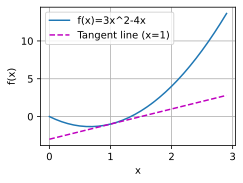

In [204]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def use_svg_display(): #@save
    """使用svg格式在jupyter中显示绘图,#@save是一个特殊标记，将对应函数、类或语句保存在d2l包中"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): #@save
    """设置matplotlib图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5,2.5), axes=None):
    """
        绘制数据点,fmts: 这是一个包含线型和颜色的元组。'-' 代表实线，'m--' 代表品红色的虚线，'g-.' 代表绿色的点划线等等。
        函数会默认给画的第一条线用第一种样式，第二条用第二种，以此类推。
    """
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()   # 清除当前坐标轴，防止旧图像叠加
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)=3x^2-4x', 'Tangent line (x=1)'])

In [203]:
np.arange(0, 3, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

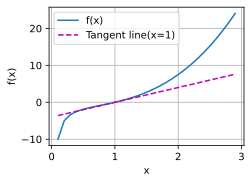

In [207]:
x = np.arange(0.1, 3, 0.1)
plot(x, [x**3 - x ** -1, 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line(x=1)'])

### 2.5自动微分

In [209]:
x = torch.arange(4.0, requires_grad=True)
x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [210]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [211]:
y.backward() # 计算梯度
x.grad   # 此时x就有梯度了

tensor([ 0.,  4.,  8., 12.])

In [212]:
x.grad == 4*x

tensor([True, True, True, True])

In [214]:
x.grad.zero_()
y = x.sum()
y.backward()
y, x.grad

(tensor(6., grad_fn=<SumBackward0>), tensor([1., 1., 1., 1.]))

In [218]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.6概率

In [223]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample() 

tensor([0., 0., 0., 1., 0., 0.])

In [226]:
multinomial.Multinomial(10, fair_probs).sample() 

tensor([2., 3., 0., 1., 2., 2.])

In [227]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1720, 0.1650, 0.1590, 0.1660, 0.1650, 0.1730])

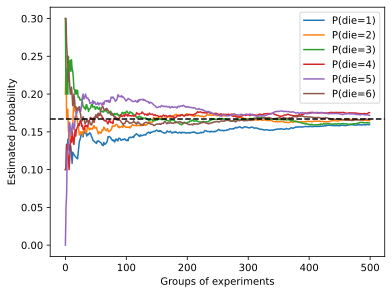

In [228]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

#### 2.7查阅文档

In [230]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [231]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [232]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

## 3 线性回归

### 3.1正态分布

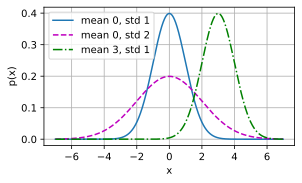

In [235]:
import math
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma **2 * (x-mu)**2)

x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

#### 3.2图像分类

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()


In [6]:
# 读取数据集
# 通过ToTensor将图像数据从PIL类型转化成float32, 并除以255让所有像素数值均在0~1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root='./data', train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='./data', train=False, transform=trans, download=True
)
len(mnist_train), len(mnist_test)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



(60000, 10000)

In [11]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [16]:
def get_fashion_mnist_labels(labels): #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

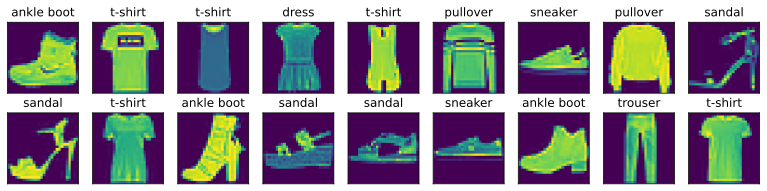

In [21]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))
# X.shape ,y.shape

In [23]:
# 读取小批量
batch_size = 256
def get_dataloader_works(): #@save
    """用4进程加载数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_works())
timer = d2l.Timer()
for X ,y in train_iter:
    continue
f'{timer.stop():.2f} sec' 

'3.04 sec'

In [ ]:
# 整合所有部件
def load_data_fashion_mnist(batch_size, resize=None): #@save
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    
